In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns',  8)

import warnings
warnings.filterwarnings("ignore")

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,...,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,...,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,...,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,...,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,...,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,...,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [4]:


### Ваш код ###
X, y = data.drop(columns=['quality']), data['quality']
# xgboost
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= le.fit_transform(y)
le.inverse_transform(y)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
### Ваш код ###

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [6]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)

BC = BaggingClassifier(n_estimators=100, random_state=42)
BC.fit(X_train, y_train)
BC_pred = BC.predict(X_test)

RFC = RandomForestClassifier(n_estimators=100, random_state=42)
RFC.fit(X_train, y_train)
RFC_red = RFC.predict(X_test)

### Ваш код ###

acc_DT = cross_val_score(DTC, X_test, y_test, cv=5, scoring='accuracy').mean()
acc_Bagging = cross_val_score(BC, X_test, y_test, cv=5, scoring='accuracy').mean()
acc_RF = cross_val_score(RFC, X_test, y_test, cv=5, scoring='accuracy').mean()
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



In [8]:
from tqdm import tqdm
n_estimators = [10, 50, 100]  +  [x for x in range(200, 5001, 200)]
### Ваш код ###

RF_accuracy_n = []
for n_tree in tqdm(n_estimators):
    RF_temp = RandomForestClassifier(n_estimators=n_tree, random_state=RANDOM_STATE)
    RF_temp.fit(X_train, y_train)
    RF_accuracy_n.append(cross_val_score(RF_temp, X_test, y_test, cv=5, scoring='accuracy').mean())

100%|██████████| 28/28 [24:46<00:00, 53.09s/it]


Text(0.5, 1.0, 'Dependens Acurrucy and N_estimators')

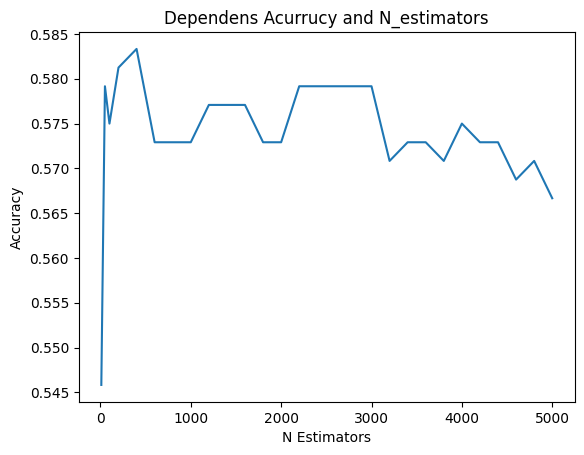

In [9]:
import matplotlib.pyplot as plt

plt.plot(n_estimators, RF_accuracy_n)
plt.xlabel('N Estimators')
plt.ylabel('Accuracy')
plt.title("Dependens Acurrucy and N_estimators")

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [11]:
# GradientBoostingClassifier / sklearn
GBC = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
GBC_pred = GBC.predict(X_test)

# xgboost

XGB = XGBClassifier(random_state=42).fit(X_train, y_train)
XGB_pred = XGB.predict(X_test)

### Ваш код ###

acc_sklearn = cross_val_score(GBC, X_test, y_test, cv=5, scoring='accuracy').mean()
acc_xgboost = cross_val_score(XGB, X_test, y_test, cv=5, scoring='accuracy')
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
              'n_estimators':[1, 5, 10, 25, 50, 100],
              'max_depth': np.arange(1,3,1)
              }

In [13]:
#sklearn
sklearn_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), cv=3,
                            param_grid=parameters,
                            scoring=('accuracy'))
sklearn_cv.fit(X_train, y_train)
best_params_sklearn = sklearn_cv.best_params_
print('Параметры лучшей модели sklearn:\n', best_params_sklearn)

#sklearn
xgboost_cv = GridSearchCV(XGBClassifier(random_state=42), cv=3,
                            param_grid=parameters,
                            scoring=('accuracy'))
xgboost_cv.fit(X_train, y_train)
best_params_xgboost= xgboost_cv.best_params_
print('Параметры лучшей модели sklearn:\n', best_params_xgboost)

Параметры лучшей модели sklearn:
 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
Параметры лучшей модели sklearn:
 {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 50}


In [14]:


### Ваш код ###
acc_sklearn_cv = cross_val_score(sklearn_cv, X_test, y_test, cv=5, scoring='accuracy').mean()
acc_xgboost_cv = cross_val_score(xgboost_cv, X_test, y_test, cv=5, scoring='accuracy').mean()
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [15]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [16]:
# lightgbm
lightgbm  = LGBMClassifier(random_state=42, verbose=-100)
lightgbm.fit(X_train, y_train)
lightgbm_pred = lightgbm.predict(X_test)

# catboost

catboostc = CatBoostClassifier(random_state=42, verbose=False)
catboostc.fit(X_train, y_train)
catboostc_pred = catboostc.predict(X_test)


### Ваш код ###
acc_lightgbm = cross_val_score(lightgbm, X_test, y_test, cv=5, scoring='accuracy').mean()
acc_catboost = cross_val_score(catboostc, X_test, y_test, cv=5, scoring='accuracy').mean()
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [17]:
#sklearn
lightgbm_cv = LGBMClassifier(GradientBoostingClassifier(random_state=42), cv=3,
                            param_grid=parameters,
                            scoring=('accuracy'))
lightgbm_cv.fit(X_train, y_train)
best_params_lightgbm = lightgbm_cv.best_params_
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)

#sklearn
catboost_cv = GridSearchCV(XGBClassifier(random_state=42), cv=3,
                            param_grid=parameters,
                            scoring=('accuracy'))
catboost_cv.fit(X_train, y_train)
best_params_catboost = catboost_cv.best_params_
print('Параметры лучшей модели catboost:\n', best_params_catboost)

### Ваш код ###


acc_lightgbm_cv = cross_val_score(lightgbm_cv, X_test, y_test, cv=5, scoring='accuracy').mean()
acc_catboost_cv = cross_val_score(catboost_cv, X_test, y_test, cv=5, scoring='accuracy').mean()
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

TypeError: Unknown type of parameter:boosting_type, got:GradientBoostingClassifier

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:
import optuna

In [ ]:


### Ваш код ###

best_params_xgboost_optuna = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = 0
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [('GradientBoostingClassifier', GradientBoostingClassifier()),
              ('XGBClassifier', XGBClassifier()),
              ('LGBMClassifier', LGBMClassifier(verbose=-100)),
              ('CatBoostClassifier', CatBoostClassifier(verbose=False))]

Stacking_models_default = StackingClassifier(estimators=estimators)
Stacking_models_default.fit(X_train, y_train)

### Ваш код ###

acc_stacking_default = cross_val_score(Stacking_models_default, X_train, y_train,cv=3, scoring='accuracy').mean()
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:
estimators = [('GradientBoostingClassifier', GradientBoostingClassifier(best_params_sklearn)),
              ('XGBClassifier', XGBClassifier(best_params_xgboost)),
              ('LGBMClassifier', LGBMClassifier(best_params_lightgbm, verbose=-100)),
              ('CatBoostClassifier', CatBoostClassifier(best_params_catboost, verbose=False))]

Stacking_models_best = StackingClassifier(estimators=estimators)
Stacking_models_best.fit(X_train, y_train)

### Ваш код ###

acc_stacking = cross_val_score(Stacking_models_best, X_train, y_train,cv=3, scoring='accuracy').mean()
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [ ]:
results